# El problema de la mochila

Se tiene una mochila y un conjunto de artículos con diferente peso y valor. Se intenta determinar que artículos se pueden colocar adentro de la mochila de manera que no se sobrepase el límite de peso de la mochila maximizando el valor total. 

Resolver el problema agregando heurística para los siguientes artículos y un límite de 30kg:

<table style="font-size:16px">
    <tr>
        <th>Item</th><td>Valor</td><td>Peso</td>
    </tr>
    <tr>
        <th>A</th><td>4</td><td>12</td>
    </tr>
    <tr>
        <th>B</th><td>2</td><td>2</td>
    </tr>
    <tr>
        <th>C</th><td>10</td><td>4</td>
    </tr>
    <tr>
        <th>D</th><td>1</td><td>1</td>
    </tr>
    <tr>
        <th>E</th><td>5</td><td>15</td>
    </tr>
    <tr>
        <th>F</th><td>3</td><td>2</td>
    </tr>
    <tr>
        <th>G</th><td>14</td><td>7</td>
    </tr>
    <tr>
        <th>H</th><td>4</td><td>10</td>
    </tr>
</table>

## Codificación

- Definir como se codificará el problema

#### Maximizar valor: Z = 4A + 2B + 10C + 1D + 5E + 3F + 14G + 4H
#### Restricción peso:  12A + 2B + 4C + 1D + 15E + 2F + 7G + 10H  <=  30

8 variables, 8 genes.

In [1]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

## Adaptación

- Definir como se calculará la adaptación de un individuo

La función adaptación será  la fórmula del Valor, que se trata de maximizar. A mayor Valor mejor adaptación.
- ¿Existen estados que deben ser penalizados?

Deberían penalizarse los que no respeten la restricción de no superar los 30 kilos.

In [2]:
def adaptation_function(population):
    fitness = []
    for pop in population:
        fitness.append( ( (pop[0] * 4) + (pop[1] * 2) + (pop[2] * 10) + (pop[3] * 1) + (pop[4] * 5) + (pop[5] * 3) + (pop[6] * 14) + (pop[7] * 4)) )
    return fitness

## Selección

In [3]:

def rank(fitness):
    array = np.array(fitness)
    temp = array.argsort()
    return (np.arange(len(array))[temp.argsort()]).tolist()


# Selección por Ranking
def probability(population, fitness):
    probability_list = []
    ranking = rank(fitness)
    print(f'Participantes: {ranking}')
    for i in range(len(population)):
        probability_list.append(
            ((ranking[i]) / sum(ranking))
        )
    return probability_list


# Seleccion de padres
def select_parents(parents_num, population_len, probability_list):

    population_aux = range(population_len)
    print(f'Probabilidad: {probability_list} \nTamaño:{len(probability_list)} \n\n')
    parent_indexs = np.random.choice(population_aux,size=parents_num, replace=False, p=probability_list)
    return [population[i] for i in parent_indexs]



## Cruza

In [4]:
def crossover(parents):
    parents = np.array(parents)
    children = np.empty((len(parents),parents.shape[1]))
    crossover_point = np.uint8(parents.shape[0]/2)
    print(f'Cruza: {crossover_point} \n\n')
    for k in range(len(parents)):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        children[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        children[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return children

## Mutación

In [5]:
def mutation(children):
    for i, child in enumerate(children):
        random_index = random.choice(range(8))
        children[i][random_index] = random.randrange(0, 30)
    return children

# Algoritmo

In [6]:
def create_population():
    population = []
    amount_population = 10  #iteraciones

    for _ in range(amount_population):
        a = random.randrange(0, 30)
        b = random.randrange(0, 30)
        c = random.randrange(0, 30)
        d = random.randrange(0, 30)
        e = random.randrange(0, 30)
        f = random.randrange(0, 30)
        g = random.randrange(0, 30)
        h = random.randrange(0, 30)

        population.append([a, b, c, d, e, f, g, h])
        
    return population

if __name__ == "__main__":
    
    population = create_population()
    population_len = len(population)
    print(f'Poblacion: {population} \n\n')
    
    best_adaptation = list()
    generation = list()
    cant_generations = 200 #Generaciones
    for i in range(cant_generations):
        fitness = adaptation_function(population)
        probability_list = probability(population, fitness)
        selected_parents = select_parents(population_len // 2, population_len, probability_list)
        childrens = crossover(selected_parents)
        childrens = mutation(childrens)
        selected_parents.extend(childrens.tolist())
        new_population = selected_parents
        population_len = len(new_population)
        population = new_population
        best_adaptation.append(max(fitness))
        generation.append(i)



Poblacion: [[27, 8, 22, 0, 22, 11, 6, 7], [27, 14, 13, 25, 6, 21, 10, 1], [4, 5, 19, 23, 10, 10, 16, 0], [20, 29, 24, 19, 5, 29, 5, 25], [13, 2, 25, 12, 12, 7, 25, 14], [4, 19, 19, 5, 2, 5, 10, 18], [9, 21, 9, 27, 16, 13, 16, 17], [10, 23, 28, 0, 28, 10, 8, 5], [0, 6, 13, 19, 23, 14, 20, 9], [22, 27, 29, 15, 5, 4, 28, 17]] 


Participantes: [3, 1, 2, 7, 8, 0, 4, 6, 5, 9]
Probabilidad: [0.06666666666666667, 0.022222222222222223, 0.044444444444444446, 0.15555555555555556, 0.17777777777777778, 0.0, 0.08888888888888889, 0.13333333333333333, 0.1111111111111111, 0.2] 
Tamaño:10 


Cruza: 2 


Participantes: [4, 5, 0, 9, 1, 7, 2, 8, 6, 3]
Probabilidad: [0.08888888888888889, 0.1111111111111111, 0.0, 0.2, 0.022222222222222223, 0.15555555555555556, 0.044444444444444446, 0.17777777777777778, 0.13333333333333333, 0.06666666666666667] 
Tamaño:10 


Cruza: 2 


Participantes: [7, 3, 9, 4, 5, 6, 0, 8, 2, 1]
Probabilidad: [0.15555555555555556, 0.06666666666666667, 0.2, 0.08888888888888889, 0.111111111

Participantes: [7, 3, 5, 9, 8, 0, 2, 4, 1, 6]
Probabilidad: [0.15555555555555556, 0.06666666666666667, 0.1111111111111111, 0.2, 0.17777777777777778, 0.0, 0.044444444444444446, 0.08888888888888889, 0.022222222222222223, 0.13333333333333333] 
Tamaño:10 


Cruza: 2 


Participantes: [2, 7, 5, 9, 8, 0, 6, 1, 3, 4]
Probabilidad: [0.044444444444444446, 0.15555555555555556, 0.1111111111111111, 0.2, 0.17777777777777778, 0.0, 0.13333333333333333, 0.022222222222222223, 0.06666666666666667, 0.08888888888888889] 
Tamaño:10 


Cruza: 2 


Participantes: [7, 4, 9, 5, 6, 1, 8, 0, 3, 2]
Probabilidad: [0.15555555555555556, 0.08888888888888889, 0.2, 0.1111111111111111, 0.13333333333333333, 0.022222222222222223, 0.17777777777777778, 0.0, 0.06666666666666667, 0.044444444444444446] 
Tamaño:10 


Cruza: 2 


Participantes: [8, 2, 6, 9, 3, 1, 4, 7, 0, 5]
Probabilidad: [0.17777777777777778, 0.044444444444444446, 0.13333333333333333, 0.2, 0.06666666666666667, 0.022222222222222223, 0.08888888888888889, 0.155555

## Gráfico

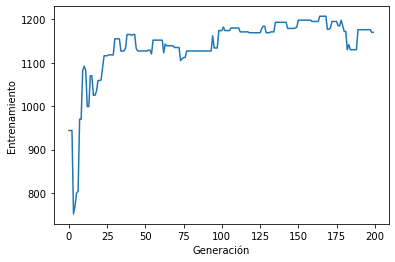

In [13]:
fig, ax = plt.subplots()
ax.plot(generation, best_adaptation)
ax.set_ylabel('Entrenamiento')
ax.set_xlabel('Generaciones')
plt.show()